In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as ss
from sklearn.tree import DecisionTreeRegressor

In [2]:
Sales_Data = pd.read_csv("...../ASS06_Data.csv")
Sales_Data.drop(["ID"], axis = 1, inplace = True)
print(Sales_Data)
pred_Sales = pd.DataFrame()

      LotArea  TotalBsmtSF  GarageCars  AGE  TotalArea  SalePrice
0       12108         1440           0   53       1440     118000
1        9400          945           0   31        980     127500
2        1680          672           0   35       1218      91500
3        8430         1040           0   31       1040     124000
4        7500         1080           0    4       1080     141000
...       ...          ...         ...  ...        ...        ...
1455     8100          849           2  111       2138     106000
1456     9142         1020           1   96       1928     137000
1457    45600          907           2  100       2358     240000
1458    10320          756           1  102       1469     135000
1459     7200         1214           2   97       2291     133900

[1460 rows x 6 columns]


C:\Users\sheet\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':


            result1        result2        result3        result4  \
0     141048.714583  131533.972676  140444.831152  135955.000743   
1     105769.216077   95706.027245  101163.547492   95345.998237   
2     107201.833023   99842.979387  101064.268718  101809.130559   
3     112579.977900  102308.486243  108075.801557  103316.291017   
4     133145.549206  122351.993975  125715.320489  123346.938697   
...             ...            ...            ...            ...   
1455  173760.011602  180647.118551  181100.731833  184999.811226   
1456  153659.581853  154099.385346  158005.250457  158874.231254   
1457  214361.313147  223664.786978  226219.371425  211727.465188   
1458  110224.681550  109521.010540  114776.378952  110428.844155   
1459  204633.665791  210113.095903  211307.739170  217726.358894   

            result5        result6        result7        result8  \
0     140664.524870  158154.021784  143294.416994  148843.405981   
1     107759.252874  115615.361166  101092.8819

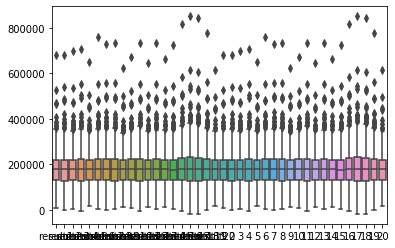

In [10]:
Linear_model = LinearRegression()
for i in range(20):
    Sample_Dataset=Sales_Data.sample(n = 1460, replace = True, random_state = 123+i) 
    X_train=Sample_Dataset.loc[:, Sample_Dataset.columns != 'SalePrice']
    y_train=Sample_Dataset['SalePrice']
    Linear_model.fit(X_train, y_train)
    pred_Sales[str(i+1)] = Linear_model.predict(Sales_Data.loc[:, Sales_Data.columns != 'SalePrice'])
pred_Sales['mean'] = pred_Sales.mean(axis=1)
for data_index, data_row in pred_Sales.iterrows():
    Error_est = 0
    for i in range(20):
        Error_est += np.square(np.subtract(data_row[str(i+1)],data_row['mean'])) 
    pred_Sales.loc[data_index,'mse'] = Error_est/20
print(pred_Sales)
HousePrice = pred_Sales.loc[:, ~pred_Sales.columns.isin(['mean', 'mse'])]
pic = ss.boxplot(data=HousePrice)

            result1        result2        result3        result4  \
0     141048.714583  131533.972676  140444.831152  135955.000743   
1     105769.216077   95706.027245  101163.547492   95345.998237   
2     107201.833023   99842.979387  101064.268718  101809.130559   
3     112579.977900  102308.486243  108075.801557  103316.291017   
4     133145.549206  122351.993975  125715.320489  123346.938697   
...             ...            ...            ...            ...   
1455  173760.011602  180647.118551  181100.731833  184999.811226   
1456  153659.581853  154099.385346  158005.250457  158874.231254   
1457  214361.313147  223664.786978  226219.371425  211727.465188   
1458  110224.681550  109521.010540  114776.378952  110428.844155   
1459  204633.665791  210113.095903  211307.739170  217726.358894   

            result5        result6        result7        result8  \
0     140664.524870  158154.021784  143294.416994  148843.405981   
1     107759.252874  115615.361166  101092.8819

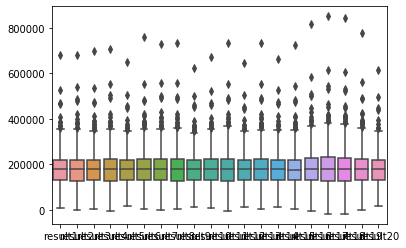

In [5]:
Linear_model = LinearRegression()
for i in range(20):
    Sample_Dataset=Sales_Data.sample(n = 1460, replace = True, random_state = 123+i) 
    X_train=Sample_Dataset.loc[:, Sample_Dataset.columns != 'SalePrice']
    y_train=Sample_Dataset['SalePrice']
    Linear_model.fit(X_train, y_train)
    pred_Sales['result'+str(i+1)] = Linear_model.predict(Sales_Data.loc[:, Sales_Data.columns != 'SalePrice'])
pred_Sales['mean'] = pred_Sales.mean(axis=1)
for data_index, data_row in pred_Sales.iterrows():
    Error_est = 0
    for i in range(20):
        Error_est += np.square(np.subtract(data_row['result'+str(i+1)],data_row['mean'])) 
    pred_Sales.loc[data_index,'mse'] = Error_est/20
print(pred_Sales)
HousePrice = pred_Sales.loc[:, ~pred_Sales.columns.isin(['mean', 'mse'])]
pic = ss.boxplot(data=HousePrice)

       result1   result2   result3   result4   result5   result6   result7  \
0     157900.0  118000.0  118000.0  157900.0  118000.0  157500.0  118000.0   
1     127500.0  127500.0  127500.0   91500.0  127500.0  127500.0  127500.0   
2      91500.0   91500.0   91500.0   91500.0   91500.0   91500.0   91500.0   
3     124000.0  124000.0  124000.0  124000.0  150500.0  127500.0  124000.0   
4     141000.0  135000.0  123600.0  123600.0  141000.0  141000.0  159000.0   
...        ...       ...       ...       ...       ...       ...       ...   
1455  106000.0  106000.0  106000.0  106000.0  106000.0  140000.0  145900.0   
1456  135900.0  190000.0  137000.0  137000.0  137000.0  137000.0  137000.0   
1457  240000.0  240000.0  129000.0  240000.0  240000.0  240000.0  274970.0   
1458  135000.0  125000.0  122000.0  108000.0  135000.0  135000.0  132000.0   
1459  266500.0  133900.0  133900.0  240000.0  133900.0  130000.0  133900.0   

       result8   result9  result10  ...  result13  result14  re

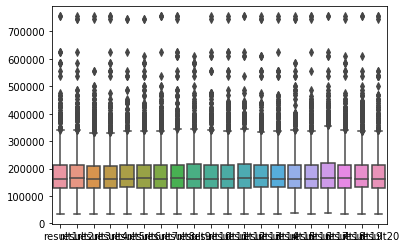

In [7]:
Sales_Data = pd.read_csv("...../ASS06_Data.csv")
Sales_Data.drop(["ID"], axis = 1, inplace = True)
pred_Sales=pd.DataFrame()
Tree_model = DecisionTreeRegressor()
for i in range(20):
    Sample_Dataset=Sales_Data.sample(n = 1460, replace = True, random_state = 123+i) 
    X_train=Sample_Dataset.loc[:, Sample_Dataset.columns != 'SalePrice']
    y_train=Sample_Dataset['SalePrice']
    Tree_model.fit(X_train, y_train)
    pred_Sales['result'+str(i+1)] = Tree_model.predict(Sales_Data.loc[:, Sales_Data.columns != 'SalePrice'])
pred_Sales['mean'] = pred_Sales.mean(axis=1)
for data_index, data_row in pred_Sales.iterrows():
    Error_est = 0
    for i in range(20):
        Error_est += np.square(np.subtract(data_row['result'+str(i+1)],data_row['mean'])) 
    pred_Sales.loc[data_index,'mse'] = Error_est/20
print(pred_Sales)
HousePrice = pred_Sales.loc[:, ~pred_Sales.columns.isin(['mean', 'mse'])]
pic = ss.boxplot(data=HousePrice)